In [1]:
%matplotlib inline

In [2]:
path_results = !ls *.logps.csv

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import LogFormatter

In [5]:
def summarize_mean_runtime_likelihood(df_stats):
    """Aggregate the runtimes."""
    unique_iters = sorted(pd.unique(df_stats['num_steps']))
    runtimes = np.asarray([
        df_stats[df_stats['num_steps']==i]['runtime'].mean()
        for i in sorted(unique_iters)
    ])
    likelihoods = np.asarray([
        df_stats[df_stats['num_steps']==i]['predictive_likelihood'].mean()
        for i in sorted(unique_iters)
    ])
    return (runtimes, likelihoods)

In [6]:
def plot_predictive_likelihood(paths_results):
    """Plot the predictive likelihoods of various methods."""
    fig, ax = plt.subplots()
    for path_results in paths_results:
        method = path_results.split('.')[0]
        df_stats = pd.read_csv(path_results)
        runtimes, likelihoods = summarize_mean_runtime_likelihood(df_stats)
        ax.plot(runtimes, likelihoods, label=method)
    return fig, ax

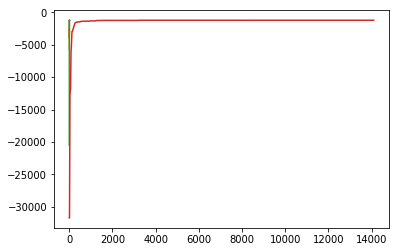

In [7]:
fig, ax = plot_predictive_likelihood(path_results)

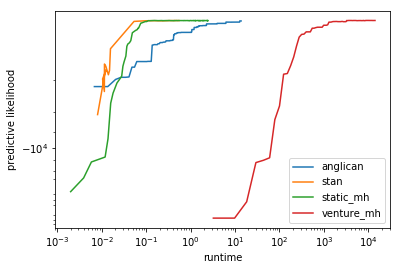

In [8]:
ax.set_xlabel('runtime')
ax.set_ylabel('predictive likelihood')
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.legend(loc='lower right')
ax.yaxis.set_minor_locator(AutoMinorLocator())
fig